## Story-2:Can the FED Control Inflation and Maintain Full Employment
## Submitted by Mahmud Hasan Al Raji

# Introduction:
In this assignment, I have examined the question, 'Has the FED been able to fulfill the mandate given to it by Congress?' by using data for the Consumer Price Index (CPI), Unemployment Rate, and the FED Funds Rate (FRED) for the last 25 years. The CPI and Unemployment data are collected through the Bureau of Labor Statistics API, and FRED data is collected through FRED API. It is noted that the CPI data is obtained from the series titled "All items in U.S. city average, all urban consumers, seasonally adjusted," whereas the unemployment rate data is derived from the series encompassing "All Industries, all Occupations, all origins of all education levels, and age 16 years and over,seasonally adjusted". It is also noted that Federal Funds Effected Rate data is used here as Federal Funds Rate data.


# Part-1: Data Collection and Data Preparation:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import pandas as pd
import json

# Set BLS API key
api_key = 'b7c75bfca53d41969fe2169acb10cc90'

# SEt CPI and unemployment rate series IDs
cpi_series_id = 'CUSR0000SA0'
unemployment_series_id = 'LNS14000000'

# Set range for year
start_year = 1997
end_year = 2023

# Create lists to store data
cpi_data_list = []
unemployment_data_list = []

# Create dictionaries to store average data for each year
avg_cpi_dict = {}
avg_unemployment_dict = {}

# Iterate through years and fetch data for each year
for year in range(start_year, end_year + 1):
    # Construct the request URL for CPI data
    cpi_url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{cpi_series_id}'
    cpi_params = {
        'registrationkey': api_key,
        'startyear': year,
        'endyear': year,
    }
    cpi_response = requests.get(cpi_url, params=cpi_params)
    cpi_json_data = json.loads(cpi_response.text)

 # Extract CPI data and append it to list
    cpi_value = cpi_json_data['Results']['series'][0]['data'][0]['value']
    cpi_data_list.append({'Year': year, 'CPI': float(cpi_value)})

    # Construct request URL for unemployment rate data
    unemployment_url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{unemployment_series_id}'
    unemployment_params = {
        'registrationkey': api_key,
        'startyear': year,
        'endyear': year,
    }
    unemployment_response = requests.get(unemployment_url, params=unemployment_params)
    unemployment_json_data = json.loads(unemployment_response.text)

    # Extract unemployment rate data and append it to list
    unemployment_value = unemployment_json_data['Results']['series'][0]['data'][0]['value']
    unemployment_data_list.append({'Year': year, 'UnemploymentRate': float(unemployment_value)})

    # Calculate average CPI for current year and store it in dictionary
    cpi_yearly_data = [float(item['value']) for item in cpi_json_data['Results']['series'][0]['data']]
    avg_cpi_dict[year] = sum(cpi_yearly_data) / len(cpi_yearly_data)

    # Calculate average unemployment rate for current year and store it in dictionary
    unemployment_yearly_data = [float(item['value']) for item in unemployment_json_data['Results']['series'][0]['data']]
    avg_unemployment_dict[year] = sum(unemployment_yearly_data) / len(unemployment_yearly_data)

# Create dataframe from lists
cpi_df = pd.DataFrame(cpi_data_list)
unemployment_df = pd.DataFrame(unemployment_data_list)

# Create dataframe for average data
avg_cpi_df = pd.DataFrame(list(avg_cpi_dict.items()), columns=['Year', 'Avg_CPI'])
avg_unemployment_df = pd.DataFrame(list(avg_unemployment_dict.items()), columns=['Year', 'Avg_Unemployment_Rate'])

# Print first few rows for each dataFrame
print("CPI Data:")
print(cpi_df)

print("\nUnemployment Rate Data:")
print(unemployment_df.head())

print("\nAverage CPI Data:")
print(avg_cpi_df.head())

print("\nAverage Unemployment Rate Data:")
print(avg_unemployment_df.head())

# Calculate inflation rate for each year
avg_cpi_df['Inflation_Rate'] = avg_cpi_df['Avg_CPI'].pct_change() * 100

# Print dataFrame with inflation rate
print("\nInflation Rate Data:")
print(avg_cpi_df.head())   #[['Year','Avg_CPI', 'Inflation_Rate']])

# Merge the dataFrames on the 'Year' column
merged_df = pd.merge(avg_cpi_df, avg_unemployment_df, on='Year', how='inner')

# Print merged dataframe
print("\nMerged Data:")
print(merged_df.head())

# Remove first row from merged dataframe
merged_df = merged_df.drop(0)

# Reset index
merged_df = merged_df.reset_index(drop=True)

# Print merged dataFrame
print("\nMerged Data:")
print(merged_df.head())

# Convert  merged dataframe to a CSV file and save it to computer
file_path = file_path = '//content//drive//My Drive//Colab Notebooks//merged_df.csv'
merged_df.to_csv(file_path, index=False)


CPI Data:
    Year      CPI
0   1997  161.800
1   1998  164.400
2   1999  168.800
3   2000  174.600
4   2001  177.400
5   2002  181.800
6   2003  185.500
7   2004  191.700
8   2005  198.100
9   2006  203.100
10  2007  211.445
11  2008  211.398
12  2009  217.347
13  2010  220.472
14  2011  227.223
15  2012  231.221
16  2013  234.719
17  2014  236.252
18  2015  237.761
19  2016  242.637
20  2017  247.805
21  2018  252.767
22  2019  258.616
23  2020  262.035
24  2021  280.887
25  2022  298.990
26  2023  306.269

Unemployment Rate Data:
   Year  UnemploymentRate
0  1997               4.7
1  1998               4.4
2  1999               4.0
3  2000               3.9
4  2001               5.7

Average CPI Data:
   Year     Avg_CPI
0  1997  160.525000
1  1998  163.008333
2  1999  166.583333
3  2000  172.191667
4  2001  177.041667

Average Unemployment Rate Data:
   Year  Avg_Unemployment_Rate
0  1997               4.941667
1  1998               4.500000
2  1999               4.216667
3  2000  

In [ ]:
import requests
import pandas as pd

# Set FRED API key
api_key = '5700e12360ef13667b99f2c031ddf867'

# SEt Effective Federal Funds Rate series ID
series_id = 'FEDFUNDS'

# Set start and end years
start_year = 1998
end_year = 2023

# Set variables for storing data
annual_avg_rates = []

# Loop through each year
for year in range(start_year, end_year + 1):
    # Construct the URL for the FRED API request
    url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={year}-01-01&observation_end={year}-12-31'

    # Send API request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()

        # Extract observations
        observations = data['observations']

        # Calculate annual average rate considering monthly values
        annual_avg_rate = sum(float(obs['value']) for obs in observations) / len(observations)

        # Append result to a list
        annual_avg_rates.append({'Year': year, 'Annual_Avg_Rate': annual_avg_rate})
    else:
       print(f"Failed to retrieve data for year {year}. Status code: {response.status_code}")

# Create dataframe from list of annual average rates
fdrate_df = pd.DataFrame(annual_avg_rates)

# Print dataframe
print(fdrate_df.head())

# Convert the dataframe to a CSV file and save it to computer
file_path = file_path = '//content//drive//My Drive//Colab Notebooks//fdrate_df.csv'
fdrate_df.to_csv(file_path, index=False)





   Year  Annual_Avg_Rate
0  1998         5.353333
1  1999         4.970000
2  2000         6.235833
3  2001         3.887500
4  2002         1.666667


## Part-2: Data Visualization:
## Visualize Individiual Plot:


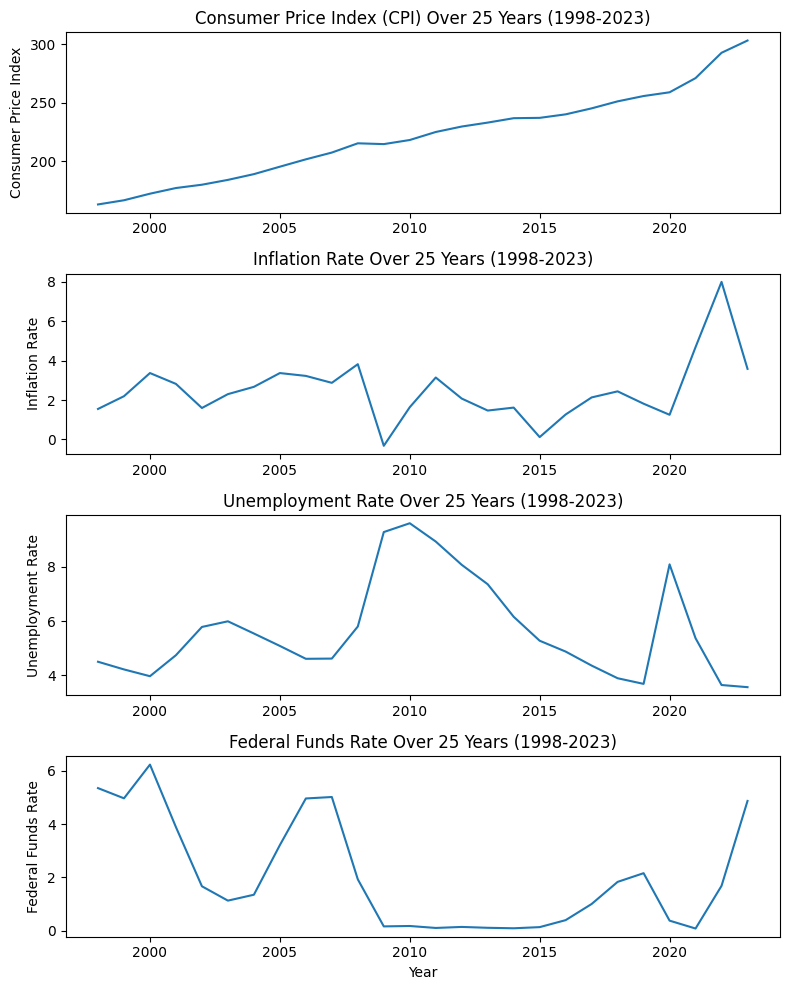

In [ ]:
import matplotlib.pyplot as plt


# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 10))

# Plot Consumer Price Index (CPI)
axs[0].plot(cpi_unemp_df['Year'], cpi_unemp_df['Avg_CPI'])
axs[0].set_title('Consumer Price Index (CPI) Over 25 Years (1998-2023)')
axs[0].set_ylabel('Consumer Price Index')

# Plot Inflation Rate
axs[1].plot(cpi_unemp_df['Year'],cpi_unemp_df['Inflation_Rate'])
axs[1].set_title('Inflation Rate Over 25 Years (1998-2023)')
axs[1].set_ylabel('Inflation Rate')

# Plot Unemployment Rate
axs[2].plot(cpi_unemp_df['Year'],cpi_unemp_df['Avg_Unemployment_Rate'])
axs[2].set_title('Unemployment Rate Over 25 Years (1998-2023)')
axs[2].set_ylabel('Unemployment Rate')

# Plot Federal Funds Rate
axs[3].plot(fderate_df['Year'],fderate_df['Annual_Avg_Rate'])
axs[3].set_title('Federal Funds Rate Over 25 Years (1998-2023)')
axs[3].set_ylabel('Federal Funds Rate')

# Set common X label
axs[3].set_xlabel('Year')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The four plots presented above illustrate the trends of the Consumer Price Index, Inflation Rate, Unemployment Rate and Federal Funds Rate spanning the past 25 years (1998-2023). The main purpose of these visualizations are to examine the Federal Reserve's actions in response to changing inflation and unemployment rates, particularly how they adjusted the federal funds rate to address these economic factors. The constant upward trend in Consumer Price Index curve over the 25 years is a clear indication of increasing living cost and thus affecting the inflation and unemployment rates.

## Visualize the Relationship between Inflation Rate and Federal Funds Rate:

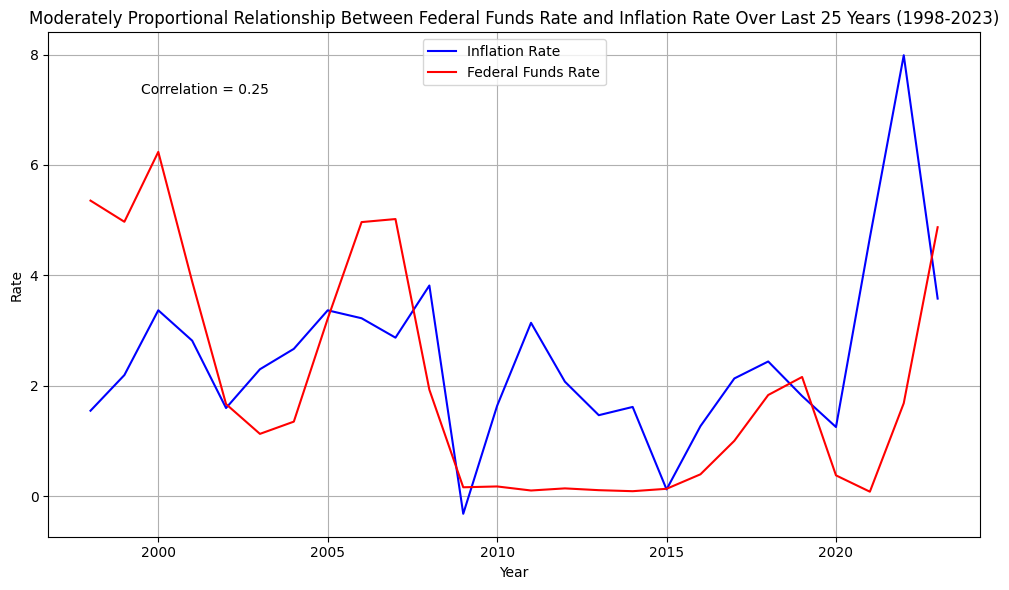

In [ ]:
import numpy as np

# Calculate correlation between Federal Funds Rate and Inflation Rate
correlation_value = cpi_unemp_df['Inflation_Rate'].corr(fderate_df['Annual_Avg_Rate'])

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Inflation Rate
ax.plot(cpi_unemp_df['Year'], cpi_unemp_df['Inflation_Rate'], label='Inflation Rate', color='blue')

# Plot Federal Funds Rate
ax.plot(fderate_df['Year'], fderate_df['Annual_Avg_Rate'], label='Federal Funds Rate', color='red')

# Add legend
ax.legend(loc='upper center')

# Add title
ax.set_title('Moderately Proportional Relationship Between Federal Funds Rate and Inflation Rate Over Last 25 Years (1998-2023)')

# Display the correlation value on the plot
textstr = f'Correlation = {correlation_value:.2f}'
#props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Label the axes
ax.set_xlabel('Year')
ax.set_ylabel('Rate')

# Show gridlines
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

The positive correlation value of 0.25 in the plot above reflects a moderate positive relationship between the Federal Funds Rate and Inflation Rate spanning the past 25 years (1998-2023). This indicates a proportional relation between them i.e. as the inflation rate increased, the federal funds rate tended to increase as well. This trend was consistently observed throughout most of the time period, with some exceptions noted after 2022 when an inverse relationship found for some reasons.

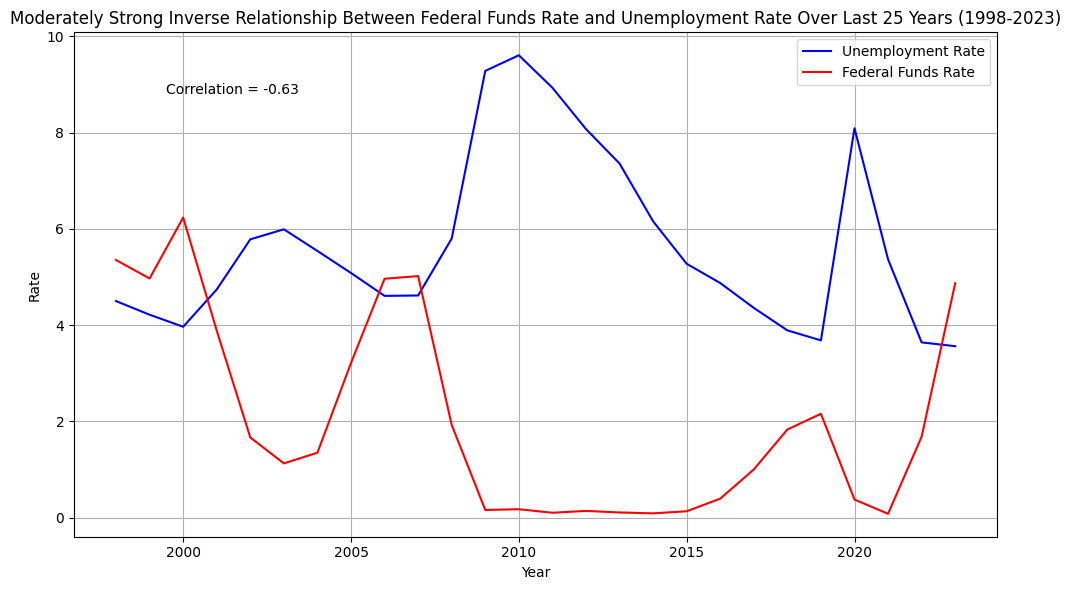

In [ ]:
# Calculate correlation between Federal Funds Rate and Unemployment Rate
correlation_value = cpi_unemp_df['Avg_Unemployment_Rate'].corr(fderate_df['Annual_Avg_Rate'])

# Set new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Unemployment Rate
ax.plot(cpi_unemp_df['Year'], cpi_unemp_df['Avg_Unemployment_Rate'], label='Unemployment Rate', color='blue')

# Plot Federal Funds Rate
ax.plot(fderate_df['Year'], fderate_df['Annual_Avg_Rate'], label='Federal Funds Rate', color='red')

# Add legend
ax.legend(loc='upper right')

# Add title
ax.set_title('Moderately Strong Inverse Relationship Between Federal Funds Rate and Unemployment Rate Over Last 25 Years (1998-2023)')

# Add correlation value on plot
textstr = f'Correlation = {correlation_value:.2f}'
ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Label axes
ax.set_xlabel('Year')
ax.set_ylabel('Rate')

# Show gridlines
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

The correlation value -0.63 in the plot above indicates a moderately strong inverse relationship between the Federal Funds Rate and Unemployment Rate plot over the last 25 years (1998-2023). This inverse relationship becomes very sharp between the years 2000 and 2010, as well as between 2015 and 2023. Notably, during the period of high unemployment rates between 2008 and 2010, the Fed maintained a very low federal funds rate. This is a clear indication of its efforts to stabilize the economic conditions during a challenging period.

# Conclusion:
From the visualizations of the relationships between the Federal Funds Rate and Inflation Rate, as well as the Federal Funds Rate and Unemployment Rate, it becomes evident that the Federal Reserve adjusted the funds rate in accordance with the general principles. Specifically, they increased the funds rate when the inflation rate rose and decreased it when the unemployment rate increased, even though with some exceptions at certain points. These exceptions might have happened due to not to consider other economic factors, which fall beyond the scope of this analysis. In summary, it can be said that this visual analysis suggests that the Federal Reserve effectively adjusted its funds rate to address the rising inflation and unemployment rates, thereby fulfilling its congressional mandate.



# Resources:
1. Consumer Price Index: https://www.bls.gov/data/
2. Unemployment Rate: https://www.bls.gov/data/
3. FED Funds Rate: https://fred.stlouisfed.org/series/FEDFUNDS#